## Predicting age of abalone 

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/home/admin1/PycharmProjects/Models in Machine Learning/')
from ipynb.fs.full.ml_library import *

# reading dataset from csv file & storing pandas dataframe
abalone_data = pd.read_table('abalone.data',sep=',',names=['Sex','Length','Diameter','Height',
                                'WholeWeight','ShuckedWeight','VisceraWeight','ShellWeight','Rings'])
abalone_data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
abalone_data.isna().sum()     # checking for null values

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [3]:
abalone_data.describe()               # observing range of all column values

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
abalone_data.groupby('Rings').mean()         

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
Rings,,,,,,,
1,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
2,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
3,0.176000,0.128667,0.041667,0.028400,0.011767,0.006267,0.008933
4,0.221491,0.161579,0.053947,0.059605,0.024719,0.012956,0.018000
5,0.285739,0.210696,0.069913,0.125500,0.061696,0.027330,0.036770
6,0.369363,0.278861,0.091776,0.273174,0.123158,0.058371,0.078388
7,0.422033,0.321535,0.105921,0.397386,0.182657,0.085899,0.111648
8,0.498776,0.384798,0.128556,0.640753,0.293773,0.138502,0.178609
9,0.546865,0.425218,0.142721,0.852013,0.387938,0.187803,0.236509


#### Creating new column of age i.e. defined on Rings column

In [5]:
abalone_data['Age'] = abalone_data['Rings'] + 1.5
abalone_data.groupby('Age').mean()
abalone_data.drop('Rings', axis=1, inplace=True)
abalone_data.groupby('Age').mean()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
Age,,,,,,,
2.5,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
3.5,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
4.5,0.176000,0.128667,0.041667,0.028400,0.011767,0.006267,0.008933
5.5,0.221491,0.161579,0.053947,0.059605,0.024719,0.012956,0.018000
6.5,0.285739,0.210696,0.069913,0.125500,0.061696,0.027330,0.036770
7.5,0.369363,0.278861,0.091776,0.273174,0.123158,0.058371,0.078388
8.5,0.422033,0.321535,0.105921,0.397386,0.182657,0.085899,0.111648
9.5,0.498776,0.384798,0.128556,0.640753,0.293773,0.138502,0.178609
10.5,0.546865,0.425218,0.142721,0.852013,0.387938,0.187803,0.236509


#### Handling outliers

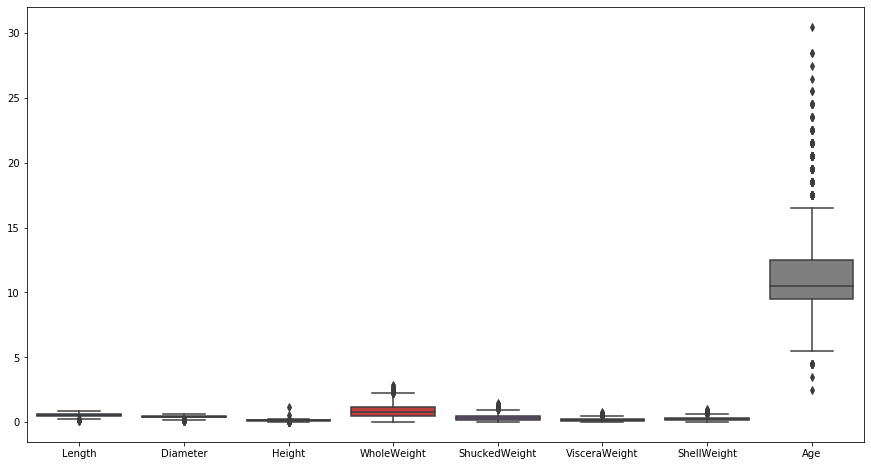

In [6]:
plt.figure(figsize=(15,8))
sns.boxplot(data= abalone_data)
plt.show()

In [7]:
abalone_data.shape

(4177, 9)

In [8]:
def remove_outliers(data):
    """Function removing numerical(continuous) columns of predictor variables"""
    numerical_col = [col for col in data.columns if data[col].dtype != 'O' and col != 'Age'] 
    for col in numerical_col:
        quarter1 = data[col].quantile(0.25)
        quarter3 = data[col].quantile(0.75)
        IQR = quarter3 - quarter1
        outliers = data.loc[(data[col] < (quarter1 - 1.5*IQR)) | (data[col] > (quarter3 + 1.5*IQR))].index
        data = data.drop(outliers)
        
    return data

abalone_data = remove_outliers(abalone_data) 

In [9]:
abalone_data.shape

(4013, 9)

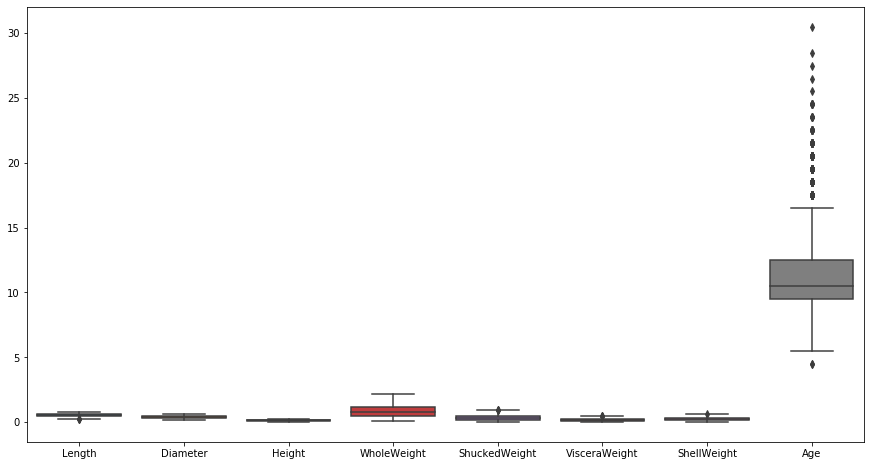

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(data= abalone_data)
plt.show()

#### Checking correlations among predictors variables

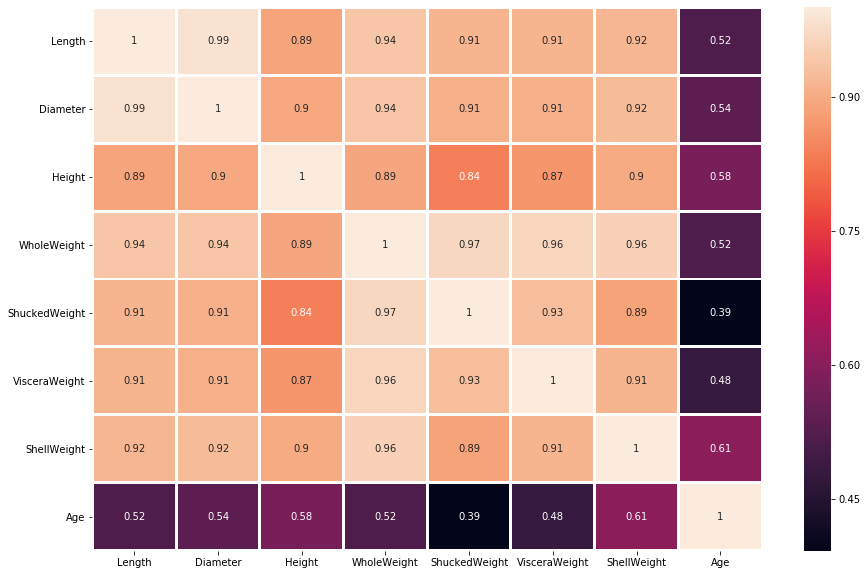

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(abalone_data.corr(), annot=True, linewidths=2)
plt.show()

In [12]:
# removing unnecessary columns
abalone_data.drop(['WholeWeight', 'VisceraWeight', 'ShellWeight','Length'], axis= 1 , inplace= True)

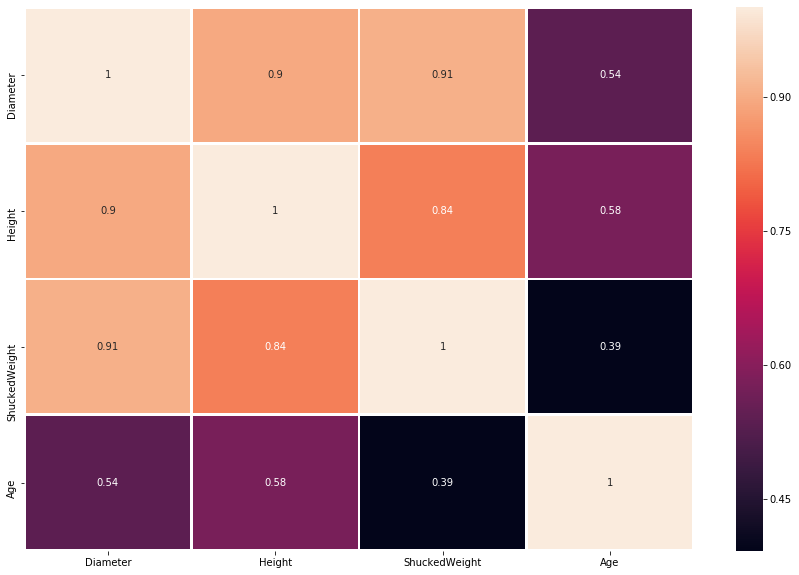

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(abalone_data.corr(), annot=True, linewidths=2)
plt.show()

#### One-hot-encoding for categorical columns

In [14]:
abalone_data = one_hot_encoding(abalone_data)
abalone_data.head()

,Diameter,Height,ShuckedWeight,Age,F,I,M
0,0.365,0.095,0.2245,16.5,0.0,0.0,1.0
1,0.265,0.090,0.0995,8.5,0.0,0.0,1.0
2,0.420,0.135,0.2565,10.5,1.0,0.0,0.0
3,0.365,0.125,0.2155,11.5,0.0,0.0,1.0
4,0.255,0.080,0.0895,8.5,0.0,1.0,0.0


#### Splitting dataset into train set & test set  

In [15]:
train, test = splitting_dataset(abalone_data)
print('Train set')
print(train.shape)
train.head()

Train set
(2809, 7)


,Diameter,Height,ShuckedWeight,Age,F,I,M
190,0.480,0.180,0.4845,14.5,0.0,0.0,1.0
188,0.480,0.160,0.5265,12.5,1.0,0.0,0.0
2604,0.485,0.175,0.5450,11.5,1.0,0.0,0.0
269,0.360,0.125,0.2035,14.5,1.0,0.0,0.0
624,0.360,0.105,0.2140,16.5,0.0,1.0,0.0


In [16]:
print('Test set')
print(test.shape)
test.head()

Test set
(1204, 7)


,Diameter,Height,ShuckedWeight,Age,F,I,M
8,0.370,0.125,0.2165,10.5,0.0,0.0,1.0
9,0.440,0.150,0.3145,20.5,1.0,0.0,0.0
12,0.380,0.135,0.2175,12.5,0.0,0.0,1.0
13,0.405,0.145,0.2725,11.5,1.0,0.0,0.0
14,0.355,0.100,0.1675,11.5,1.0,0.0,0.0


#### Creating predisctors variable matrix & target variables array in both sets

In [17]:
def create_pred_target(data):   
    """Function returns predictors' matrix & target variable's array for given dataset"""
    y_values = np.array(data['Age'])
    x_values = np.ones((1,len(data)))
    
    for col in data.columns:
        if col != 'Age':
            new_row = np.array(data[col]).reshape(1,len(data))
            x_values = np.append(x_values, new_row, axis=0)

    return x_values, y_values

train_x_values, train_y_values = create_pred_target(train)
test_x_values, test_y_values = create_pred_target(test)

### Building logistic regression model

In [18]:
total = len(train)        # total training records

# initialising all parameters (theta0, theta1,...theta(n)) to 0 
theta = np.zeros(len(train_x_values))

# defining prediction fn using sigmoid function
predict = lambda x_values: 1/(1 + np.exp(-(theta.dot(x_values))))

In [19]:
def logistic_regression_model(train_cat_values):

    # defining derivative of cost function
    def derivate_cost_func(row):
        return (predict(train_x_values) - train_cat_values).dot(train_x_values[row])/total

    iterations = 1000          
    alpha = 0.1

    for _ in range(iterations):
        theta_copy = np.copy(theta)
        for index in range(len(theta_copy)):
            theta[index] = theta_copy[index] - alpha * derivate_cost_func(index)
    
    return theta

#### Storing predictions for train set & test set

In [20]:
train_cat_values1 = np.where(train_y_values <= 10, 1, 0)
theta = logistic_regression_model(train_cat_values1)
train_predicted_values1 = predict(train_x_values)
test_predicted_values1 = predict(test_x_values)

In [21]:
train_cat_values2 = np.where((10 < train_y_values) & (train_y_values <= 20), 1, 0)
theta = logistic_regression_model(train_cat_values2)
train_predicted_values2 = predict(train_x_values)
test_predicted_values2 = predict(test_x_values)

In [22]:
train_cat_values3 = np.where(train_y_values >20, 1, 0)
theta = logistic_regression_model(train_cat_values3)
train_predicted_values3 = predict(train_x_values)
test_predicted_values3 = predict(test_x_values)

#### Creating matrix of actual target variable category values

In [23]:
def make_matrix_target_category(y_values):
    """Function returns matrix one-hot-encoding for given """
    cat_values1 = np.where(y_values <= 10, 1, 0)
    cat_values2 = np.where((10 < y_values) & (y_values <= 20), 1, 0)
    cat_values3 = np.where(y_values >20, 1, 0)
    cat_values1 = cat_values1.reshape(len(y_values),1)
    cat_values2 = cat_values2.reshape(len(y_values),1)
    cat_values3 = cat_values3.reshape(len(y_values),1)
    y_values = cat_values1
    y_values = np.append(y_values, cat_values2, axis=1)
    y_values = np.append(y_values, cat_values3, axis=1)
    return y_values

In [24]:
train_y_values = make_matrix_target_category(train_y_values)
test_y_values = make_matrix_target_category(test_y_values)
train_y_values[:10]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [25]:
test_y_values[:10]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

#### Creating matrix of predicted probability using predictions from 3 logistic regression models

In [26]:
train_predicted_values1 = train_predicted_values1.reshape(total,1)
train_predicted_values2 = train_predicted_values2.reshape(total,1)
train_predicted_values3 = train_predicted_values3.reshape(total,1)
train_predicted_values = train_predicted_values1
train_predicted_values = np.append(train_predicted_values, train_predicted_values2, axis=1)
train_predicted_values = np.append(train_predicted_values, train_predicted_values3, axis=1)
train_predicted_values[:10]

array([[0.14936154, 0.80794341, 0.02443657],
       [0.11491381, 0.84420188, 0.02912579],
       [0.11013379, 0.84725154, 0.02892128],
       [0.21847756, 0.7855983 , 0.03201514],
       [0.66274791, 0.32889766, 0.00847236],
       [0.09743385, 0.85600623, 0.02834611],
       [0.62160794, 0.34848184, 0.008196  ],
       [0.6136378 , 0.35170055, 0.0080935 ],
       [0.10833073, 0.83635696, 0.02377911],
       [0.64295792, 0.33705471, 0.00822364]])

In [27]:
test_predicted_values1 = test_predicted_values1.reshape(len(test),1)
test_predicted_values2 = test_predicted_values2.reshape(len(test),1)
test_predicted_values3 = test_predicted_values3.reshape(len(test),1)
test_predicted_values = test_predicted_values1
test_predicted_values = np.append(test_predicted_values, test_predicted_values2, axis=1)
test_predicted_values = np.append(test_predicted_values, test_predicted_values3, axis=1)
test_predicted_values[:10]

array([[0.25376029, 0.75099874, 0.02678054],
       [0.16938142, 0.810276  , 0.03011807],
       [0.25028712, 0.752266  , 0.02654314],
       [0.18737076, 0.80097107, 0.03088936],
       [0.2334432 , 0.77829469, 0.03232424],
       [0.22971871, 0.78080709, 0.03263259],
       [0.11728152, 0.842449  , 0.02910239],
       [0.1849278 , 0.78793706, 0.02562908],
       [0.12876838, 0.82106844, 0.02375555],
       [0.25516235, 0.75128542, 0.0271633 ]])

#### One-hot-encoding for predicted target variable category, most probable category assigned to a record 

In [32]:
# finding maximum value in each row i.e. category to be assigned
train_prediction = np.zeros_like(train_predicted_values)
train_prediction[np.arange(len(train_predicted_values)),train_predicted_values.argmax(1)] = 1
train_prediction[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [29]:
test_prediction = np.zeros_like(test_predicted_values)
test_prediction[np.arange(len(test_predicted_values)),test_predicted_values.argmax(1)] = 1
test_prediction[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

### Evaluating model against train set & test set

In [30]:
train_accuracy_percent = accuracy_classification(train_prediction, train_y_values)
train_accuracy_percent

83.88513112614217

In [31]:
test_accuracy_percent = accuracy_classification(test_prediction, test_y_values)
test_accuracy_percent

84.0531561461794